In [1]:
import pandas as pd
import tile_extraction
train_df = pd.read_csv("train_subset.csv").sample(n=10, random_state=0).reset_index(drop=True)

images = list(train_df['image_id'])
labels = list(train_df['isup_grade'])

data_dir = 'train_images/'

ex_url = data_dir + images[1] + '.tiff'

_, best_coordinates, best_regions = tile_extraction.generate_patches(ex_url)

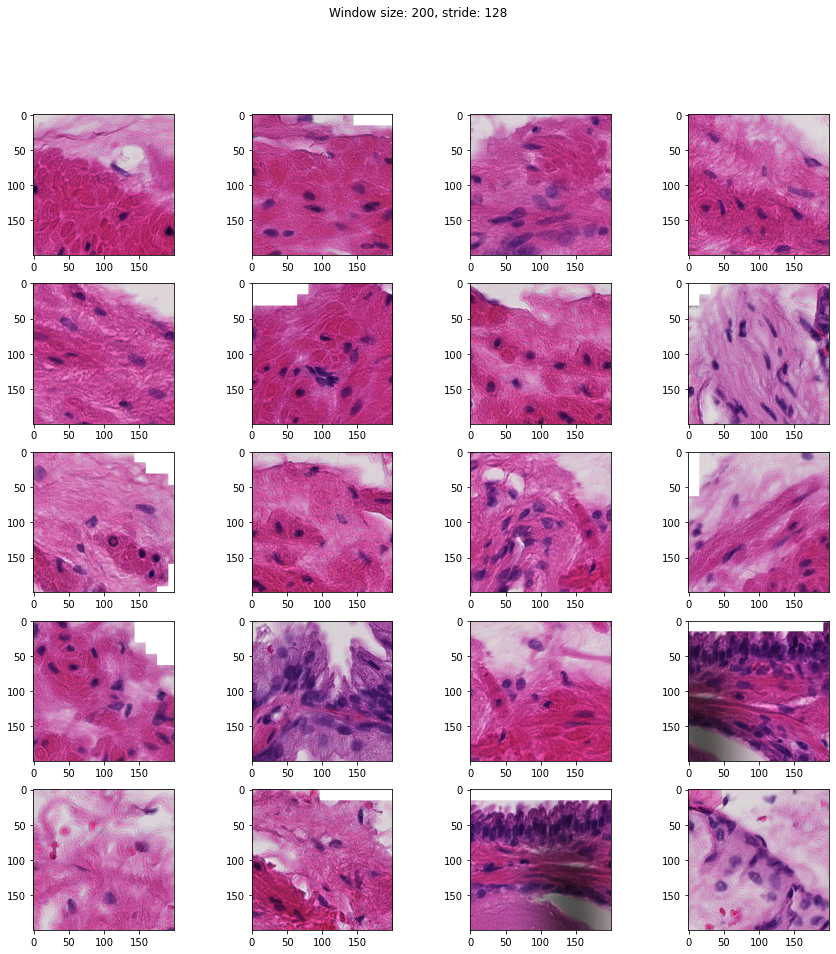

In [2]:
tile_extraction.display_images(best_regions, 'Window size: 200, stride: 128')

In [5]:
WINDOW_SIZE = 128
STRIDE = 128
K = 16

Text(0.5, 0.98, 'From biopsy to glued patches')

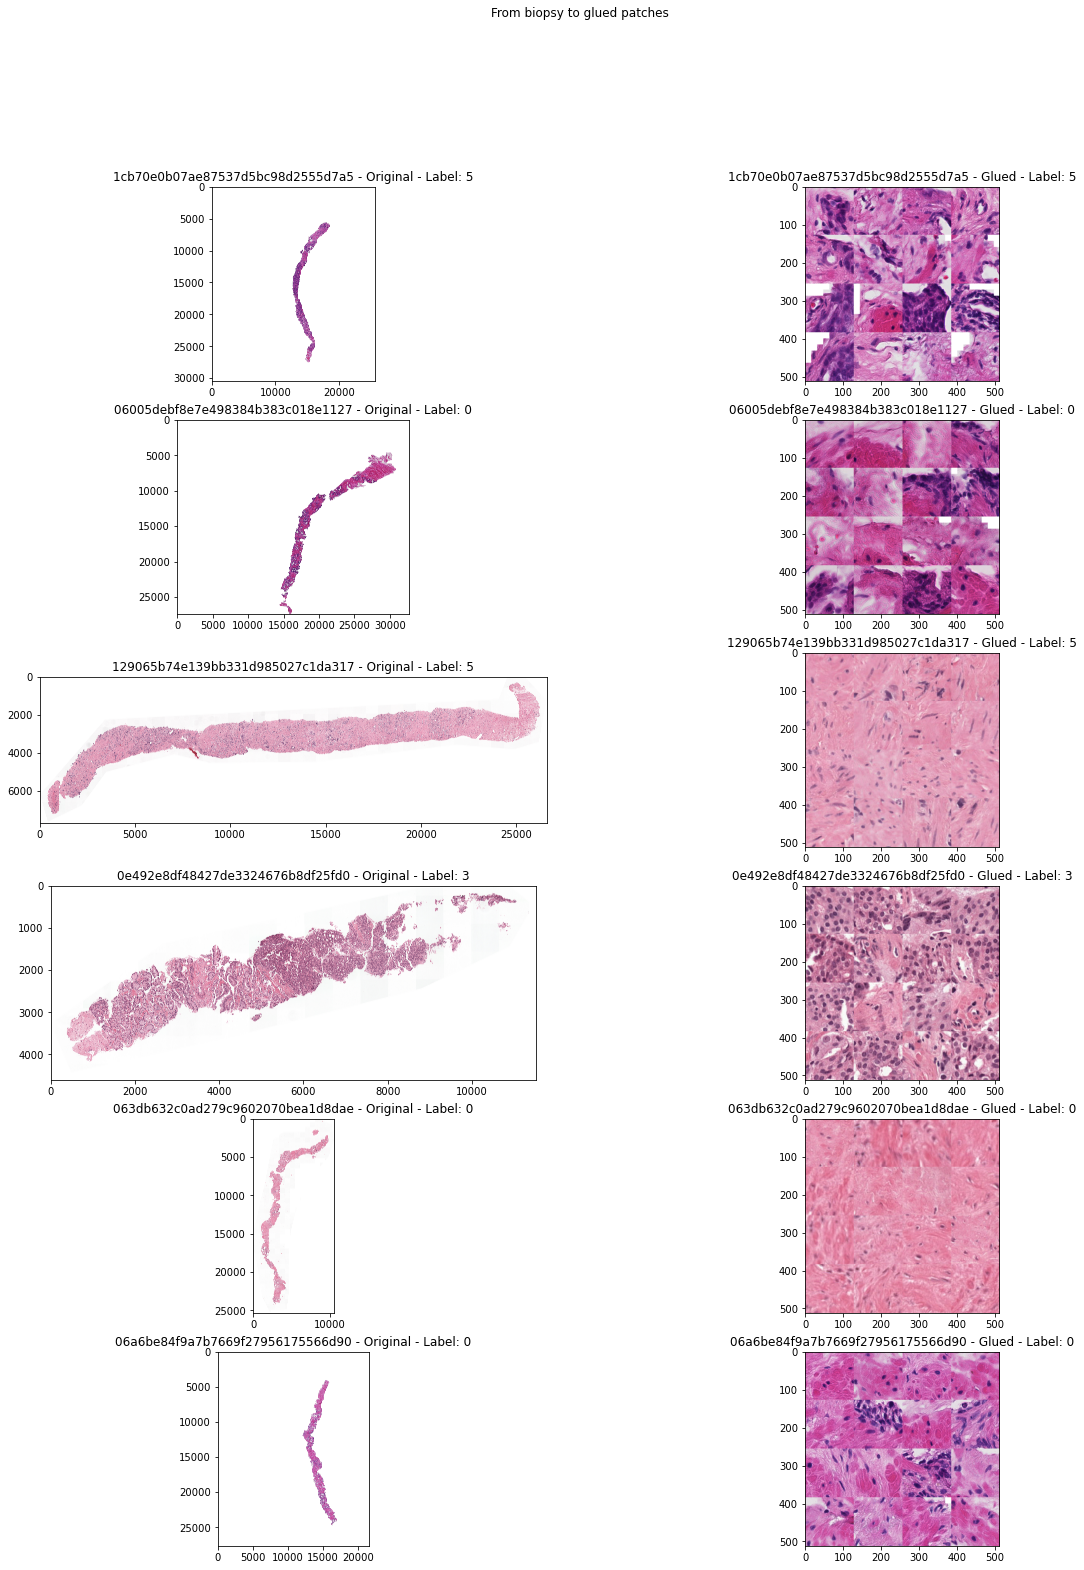

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(6, 2, figsize=(20, 25))

for i, img in enumerate(images[:6]):
    url = data_dir + img + '.tiff'
    image, best_coordinates, best_regions = tile_extraction.generate_patches(url, window_size=WINDOW_SIZE, stride=STRIDE, k=K)
    glued_image = tile_extraction.glue_to_one_picture(best_regions, window_size=WINDOW_SIZE, k=K)
    
    ax[i][0].imshow(image)
    ax[i][0].set_title(f'{img} - Original - Label: {labels[i]}')
    
    ax[i][1].imshow(glued_image)
    ax[i][1].set_title(f'{img} - Glued - Label: {labels[i]}')

fig.suptitle('From biopsy to glued patches')